In [349]:
__author__ = "Tom Curran"

import pandas as pd
import numpy as np
from scipy.linalg import norm
import scipy.linalg as la
import matplotlib.pyplot as plt
from math import sqrt


# Problem 1

In [21]:
A = np.random.random((6,4))
Q,R = la.qr(A, mode = 'economic')

# Verify that R is upper triangular, Q is orthonormal, and QR = A.
np.allclose(np.triu(R), R)
np.allclose(Q.T @ Q, np.identity(4))
np.allclose(Q @ R, A)


def modified_gramschmidt(A):
    m, n = np.shape(A)

    q = np.copy(A)
    r = np.zeros((n,n))

    for i in range(0,n):
        r[i,i] = la.norm(q[:,i])
        q[:,i] = q[:,i] / r[i,i]
        for j in range(i+1,n):
            r[i,j] = q[:,j] @q[:,i]
            q[:,j] = q[:,j] - ( r[i,j] * q[:,i])

    return(q,r)

In [23]:
A2 = np.random.random((4,4))
q1, r1 = modified_gramschmidt(A2)
print(np.allclose(np.triu(r1), r1))
print(np.allclose(q1.T @ q1, np.identity(4)))
print(np.allclose(q1 @ r1, A2))

True
True
True


# Problem 2

Write a function that accepts an invertible matrix A. Use the QR decomposition of A and (3.1) to calculate |det(A)|. You may use your QR decomposition algorithm from Problem 1 or SciPy’s QR routine. Can you implement this function in a single line?
(Hint: np.diag() and np.prod() may be useful.)
Check your answer against la.det(), which calculates the determinant.

In [33]:
def detQR(A):
    return(np.prod(np.diag(la.qr(A)[1])))

In [37]:
print("Error: ",la.det(A)-detQR(A))

Error:  0.20055815590128034


# Problem 3

Problem 3. Write a function that accepts an invertible n ⇥ n matrix A and a vector b of length n. Use the QR decomposition to solve Ax = b in the following steps:
1. Compute Q and R.
2. Calculate y = QTb.
3. Use back substitution to solve Rx = y for x.

In [68]:
def lin_system(A, b):
    print(A)
    print(b)
    q, r = la.qr(A)
    
    m, n = A.shape
    
    y = q.T @ b
    
    x = np.zeros([len(b)])
  
    
    for i in range(n-1,-1,-1):
        #print("X at point {}".format(i))
        
        x[i] = b[i]/A[i,i]
        
        for j in range(0, i):
            b[j] = b[j] - (A[j,i] * x[i])
            
    return(print("Back Subsitution: {}".format(x)))
    

In [69]:
b = np.array([1,2,3,4])
A3 = np.random.random((4,4))
p3 = lin_system(A3, b)
print(p3)

[[0.3383647  0.25772245 0.33049093 0.96307184]
 [0.97278626 0.50297536 0.29284887 0.24994275]
 [0.50444192 0.88808074 0.21459504 0.22144405]
 [0.03982702 0.65078908 0.42162724 0.13699583]]
[1 2 3 4]
Back Subsitution: [-65.01860181   0.         -13.97981965  29.19796909]
None


# Problem 4

In [80]:
A = np.random.random((5,3))

Q,R = la.qr(A)

print(A.shape, Q.shape, R.shape)

print(np.allclose(Q @ R, A))

(5, 3) (5, 5) (5, 3)
True


In [119]:
def householder(A):
    m,n = A.shape
    
    R = A.copy()
    
    Q = np.identity(m)
    
    sign = lambda x: 1 if x >= 0 else -1
    
    for k in range(0, n):
        u = np.copy(R[k:,k])
        u[0] = u[0] + np.sign(u[0]) * la.norm(u)
        u = u / la.norm(u)
        
        R[k:, k:] = R[k:, k:] - 2*np.outer(u, (u.T @ R[k:, k:]))
        Q[k:, :]  = Q[k:, :] - 2*np.outer(u, (u.T @ Q[k:, :]))
        
    return Q.T, R

In [120]:
A = np.random.random((6,4))

In [121]:
Q_T, R = householder(A)

print(A.shape, Q_T.shape, R.shape)
np.allclose(Q_T @ R, A)

(6, 4) (6, 6) (6, 4)


True

# Problem 5

In [172]:
def hessenberg(A):
    m, n = A.shape 
    H = np.copy(A)
    Q = np.identity(m)
    
    for k in range(n-1):
        u = np.copy(H[k+1:, k])
        
        u[0] = u[0] + np.sign(u[0]) * la.norm(u)

        u = u / la.norm(u)

        H[k+1:, k:] = H[k+1:, k:]  - 2*np.outer(u, (u.T@H[k+1:, k:]))
        
        H[:, k+1:] = H[:, k+1:] - 2(u.T@(H[:,k+1:]@u))
        
        Q[k+1:, :] = Q[k+1:, :] - 2*np.outer(u, u.T@Q[k+1:, :])
        
    return(Q.T, H)


In [ ]:
A = np.random.random((8,8))
q, h = hessenberg(A)
np.allclose(np.triu(H, -1), H)
np.allclose(Q @ H @ Q.T, A)

# Least Squares and Eigen Values

## Problem 1

Problem 1. Write a function that accepts an m ⇥ n matrix A of rank n and a vector b of length n. Use the QR decomposition and (4.1) to solve the normal equations corresponding to Ax = b.
You may use either SciPy’s QR routine or one of your own QR routines. In addition, you may use la.solve_triangular(), SciPy’s optimized routine for solving triangular systems.

In [227]:
def leastSquares(A, b):
    q,r = modified_gramschmidt(A)
    s = np.dot(q.T, b)
    t = la.solve_triangular(r,s)
    return(t)

In [228]:
A = np.random.random((5,5))
b = np.random.random(5)
print(leastSquares(A, b))

[ 6.54495229 -4.24942385 -4.85458818 -3.88306478  5.29161605]


## Problem 2

Problem 2. The file housing.npy contains the purchase-only housing price index, a measure of how housing prices are changing, for the United States from 2000 to 2010.a Each row in the array is a separate measurement; the columns are the year and the price index, in that order. To avoid large numerical computations, the year measurements start at 0 instead of 2000.
Find the least squares line that relates the year to the housing price index (i.e., let year be the x-axis and index the y-axis).
1. Construct the matrix A and the vector b described by (4.2).
(Hint: np.vstack(), np.column_stack(), and/or np.ones() may be helpful.)
2. Use your function from Problem 1 to find the least squares solution.
3. Plot the data points as a scatter plot.
4. Plot the least squares line with the scatter plot.

In [229]:
housing = np.load("housing.npy")
print(pd.DataFrame(housing))

       0       1
0    0.0  136.86
1    0.5  142.70
2    1.0  146.53
3    1.5  152.65
4    2.0  156.08
5    2.5  163.71
6    3.0  168.12
7    3.5  176.16
8    4.0  182.12
9    4.5  193.75
10   5.0  201.04
11   5.5  214.33
12   6.0  219.40
13   6.5  224.39
14   7.0  223.85
15   7.5  223.79
16   8.0  211.57
17   8.5  203.97
18   9.0  193.75
19   9.5  193.51
20  10.0  187.84
21  10.5  187.59
22  11.0  177.82
23  11.5  181.29
24  12.0  178.66
25  12.5  188.22
26  13.0  190.87
27  13.5  203.11
28  14.0  203.56
29  14.5  212.70
30  15.0  214.26
31  15.5  224.90
32  16.0  226.51


In [232]:
A = np.column_stack((housing[:,0], np.ones(len(housing))))
b = housing[:,1]
least_sq = leastSquares(A, b)

array([  3.37476604, 164.08096257])

Text(0.5,0,'Period')

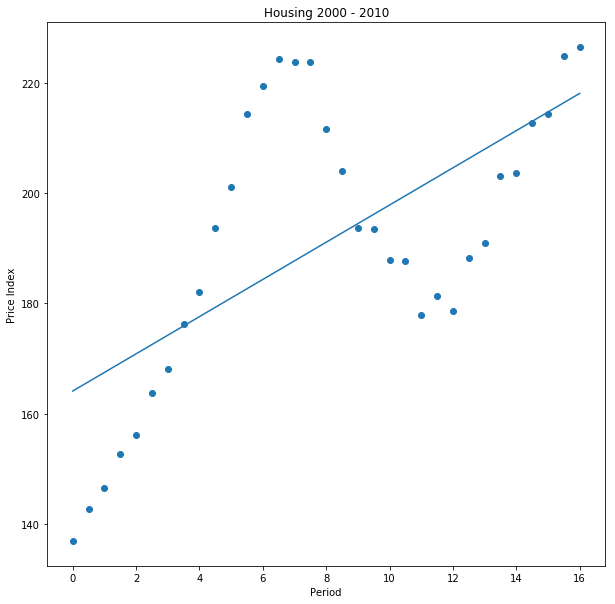

In [235]:
#plot

least_sq_val = A @ least_sq

%matplotlib inline
plt.figure(figsize = (10,10))
plt.scatter(housing[:,0], housing[:,1])
plt.plot(housing[:,0],least_sq_val)
plt.title("Housing 2000 - 2010")
plt.ylabel("Price Index")
plt.xlabel("Period")

## Problem 3

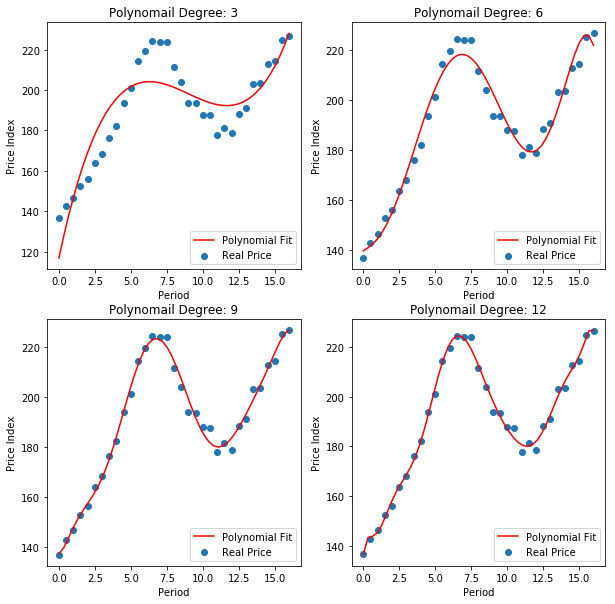

In [254]:
poly_deg = np.array([3,6,9,12])
domain = np.linspace(0, 16, 50)

plt.figure(figsize = (10,10))
for i in range(0, len(poly_deg)):
    
    x = np.polyfit(housing[:,0], housing[:,1], poly_deg[i])
    y = np.poly1d(x)
    z = y(domain)
    subplot = int(str(22)+str(i+1))
    plt.subplot(subplot)
    plt.scatter(housing[:,0], housing[:,1], label = "Real Price")
    plt.plot(domain, z, c = "r", label = "Polynomial Fit")
    plt.title(r"Polynomail Degree: {}".format(poly_deg[i]))
    plt.legend()
    plt.ylabel("Price Index")
    plt.xlabel("Period")


## Problem 4:

Problem 4. The general equation for an ellipse is

$ax^2 +bx+cxy+dy+ey^2 =1$

Write a function that calculates the parameters for the ellipse that best fits the data in the file ellipse.npy. Plot the original data points and the ellipse together, using the following function to plot the ellipse.

In [286]:
def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

In [287]:
ellipse = np.load("ellipse.npy")
x = ellipse[:,0]
y = ellipse[:,1]
A = np.column_stack((x ** 2, x, x * y, y, y ** 2))
b = np.ones(len(ellipse))

In [288]:
a,b,c,d,e = la.lstsq(A,b)[0]

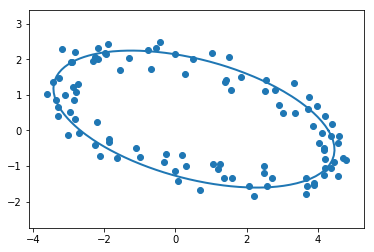

In [294]:
plot_ellipse(a, b, c, d, e)
plt.scatter(ellipse[:,0], ellipse[:,1])

# Problem 5

In [330]:
def powerMethod(A, N, tolerance):
    m,n = A.shape
    x = np.random.random(n)
    x = x / la.norm(x)
    
    iter = 1
    
    e = tolerance + 1
    
    x_k = x
    
    while(iter < N and e > tolerance):
        x_kp1 = np.dot(A, x)
        x_kp1 = x_kp1/la.norm(xk)
        e = la.norm(x_kp1 - x_k)
        x_k = x_kp1
        iter += 1
    z = np.dot(A,x_k)
    y = np.dot(x_k.T, z)
    
    return(y, x_k)

In [331]:
A = np.random.random((10,10))

In [337]:
y, x = powerMethod(A, 10, 1e-10)

In [338]:
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
np.allclose(A@ x, lamb * x)

True

## Problem 6

In [352]:
def qrAlg(A, N, tol):
    m,n = A.shape
    S = la.hessenberg(A)
    for i in range(0, N):
        q,r = la.qr(S)
        S = r@q
    
    eigs = []
    
    i = 0
    
    while i < n:
        if(S[i,i] == np.diag(S)[-1]):
            eigs.append(S[i,i])
        elif(S[i+1, i+1] < tol):
            eigs.append(S[i,i])
        else:
            a = 1
            b = -(S[i,i] + S[i+1, i+1])
            c = (S[i,i] * S[i+1, i+1] - S[i, i+1] * S[i+1, i])
            eig1 = (-b + sqrt(b ** 2 - 4*a*c)) / (2*a)
            eig2 = (-b - sqrt(b ** 2 - 4*a*c)) / (2*a)
            eigs.append([eig1, eig2])
        i+=1
    return(eigs)

In [355]:
A = np.random.random((5,5))
A = A + A.T
eigenVals = qrAlg(A, 100, 1e-10)

np_eigen = la.eig(A)

In [358]:
print(eigenVals)

[4.9995457562731405, [1.4859387039182317, -1.8759737203485738], 1.485938703918232, -0.5468656123078821, -0.1708874680348509]


In [359]:
print(np_eigen)

(array([ 4.99954576+0.j,  1.4859387 +0.j, -1.87597372+0.j, -0.17088747+0.j,
       -0.54686561+0.j]), array([[-0.40219668, -0.52283344, -0.46360351, -0.34136688, -0.48313917],
       [-0.44973271, -0.4133012 ,  0.77094503,  0.17547876, -0.04211368],
       [-0.423235  ,  0.21483419, -0.32299487,  0.80668386, -0.14019227],
       [-0.43729206, -0.1294602 , -0.24508655, -0.14660074,  0.84288583],
       [-0.51538928,  0.70207809,  0.16224189, -0.42478846, -0.18625947]]))


# The SVD and Image Compression

## Problem 1

Problem 1. Write a function that accepts a matrix A and a small error tolerance tol. Use Algorithm 6.1 to compute the compact SVD of A. In step 6, compute r by counting the number of singular values that are greater than tol.

Consider the following tips for implementing the algorithm.
• The Hermitian AH can be computed with A.conj().T.

• In step 4, the way that   is sorted needs to be stored so that the columns of V can be sorted the same way. Consider using np.argsort() and fancy indexing to do this, but remember that by default it sorts from least to greatest (not greatest to least).

• Step 9 can be done by looping over the columns of V , but it can be done more easily and efficiently with array broadcasting.

Test your function by calculating the compact SVD for random matrices. Verify that U and V are orthonormal, that U⌃VH = A, and that the number of nonzero singular values is the rank of A. You may also want to compre your results to SciPy’s SVD algorithm.

In [371]:
def compactSVD(A, tol = 1e-10):
    lam, V = la.eig(np.dot(A.conj().T,A))
    
    sigma = np.sqrt(lam)
    
    i = np.argsort(sigma)[::-1]
    
    sigma = sigma[i]
    
    V = V[i]
    
    r = len(sigma[sigma > tol])
    
    sigma_1 = sigma[:r]
    
    V_1 = V[:,:r]
    
    U_1 = A @ (V_1 / sigma_1)
    
    return(U_1, sigma_1, V_1.conj().T)
    

In [374]:
A = np.random.random((10,5))
u, sig, v = compactSVD(A)
u1, sig1, v1 = la.svd(A)

In [377]:
print(sig)
print(sig1)

[3.8410126 +0.j 1.27966777+0.j 0.8599584 +0.j 0.6885642 +0.j
 0.54543906+0.j]
[3.8410126  1.27966777 0.8599584  0.6885642  0.54543906]


In [378]:
print(u, u1)

[[ 0.43414028+0.j -0.13824828+0.j  0.41717555+0.j -0.17053615+0.j
  -0.05807056+0.j]
 [ 0.35581372+0.j  0.24407849+0.j  0.10574752+0.j -0.30998951+0.j
  -0.42651043+0.j]
 [ 0.13110377+0.j -0.07059717+0.j -0.21912522+0.j  0.52073488+0.j
  -0.17988958+0.j]
 [ 0.24628791+0.j -0.19727865+0.j -0.32400897+0.j -0.30424492+0.j
  -0.11840842+0.j]
 [ 0.44451891+0.j -0.08817042+0.j  0.0009448 +0.j  0.11011308+0.j
  -0.40030378+0.j]
 [ 0.25590517+0.j -0.74012754+0.j  0.02158149+0.j -0.12203469+0.j
   0.43390573+0.j]
 [ 0.18653628+0.j -0.18546979+0.j -0.03614316+0.j  0.65063476+0.j
  -0.13423433+0.j]
 [ 0.40698718+0.j  0.39091031+0.j -0.25046192+0.j  0.10296175+0.j
   0.56246351+0.j]
 [ 0.17367008+0.j  0.24027081+0.j  0.6775989 +0.j  0.20974875+0.j
   0.25417115+0.j]
 [ 0.33673836+0.j  0.27732202+0.j -0.37167178+0.j -0.0784572 +0.j
   0.14433129+0.j]] [[-0.43414028 -0.13824828 -0.41717555  0.17053615 -0.05807056 -0.55453169
  -0.14581298 -0.23959669 -0.44049217 -0.0755822 ]
 [-0.35581372  0.2440784

In [379]:
print(v, v1)

[[ 0.47713593  0.42794972  0.53074133  0.45535989  0.31648279]
 [ 0.29963036 -0.6268805   0.22898116  0.39467148 -0.55591774]
 [-0.41237685  0.35561735 -0.36143836  0.70697685 -0.27023636]
 [ 0.64915802 -0.05171912 -0.73148604  0.09821631  0.17663731]
 [-0.30183134 -0.54290083 -0.01310582  0.35695811  0.6975426 ]] [[-0.47713593 -0.42794972 -0.53074133 -0.45535989 -0.31648279]
 [ 0.29963036 -0.6268805   0.22898116  0.39467148 -0.55591774]
 [ 0.41237685 -0.35561735  0.36143836 -0.70697685  0.27023636]
 [-0.64915802  0.05171912  0.73148604 -0.09821631 -0.17663731]
 [-0.30183134 -0.54290083 -0.01310582  0.35695811  0.6975426 ]]


## Problem 2

In [427]:
def svd_viz(A):
    S = np.zeros((2,200))
    theta = np.linspace(0, 2 * np.pi, 200)
    S[0,:] = np.cos(theta)
    S[1,:] = np.sin(theta)
    
    E = np.array([[1, 0, 0], [0, 0, 1]])
    
    u, sigma, v = la.svd(A)
    plt.figure(figsize = (10,10))
    
    fig, axes = plt.subplots(2,2, figsize = (10,10))
       
    axes[0,0].plot(S[0,:],S[1,:])
    axes[0,0].plot(E[0,:], E[1,:])
    
    axes[0,1].plot(np.dot(v, S)[0, :], np.dot(v, S)[1, :], '-', lw=1)
    axes[0,1].plot(np.dot(v, E)[0, :], np.dot(v, E)[1, :], 'orange')

    axes[1,0].plot((np.diag(sigma) @ v @ S)[0, :], (np.diag(sigma) @ v @ S)[1, :], '-', lw=1)
    axes[1,0].plot((np.diag(sigma) @ v @ E)[0, :], (np.diag(sigma) @ v @ E)[1, :], 'orange')

    axes[1,1].plot((U @ np.diag(sigma) @ v @ S)[0, :], (U @ np.diag(sigma) @ v @ S)[1, :])
    axes[1,1].plot((U @ np.diag(sigma) @ v @ E)[0, :], (U @ np.diag(sigma) @ v @ E)[1, :])

ValueError: shapes (5,5) and (2,200) not aligned: 5 (dim 1) != 2 (dim 0)

<Figure size 720x720 with 0 Axes>

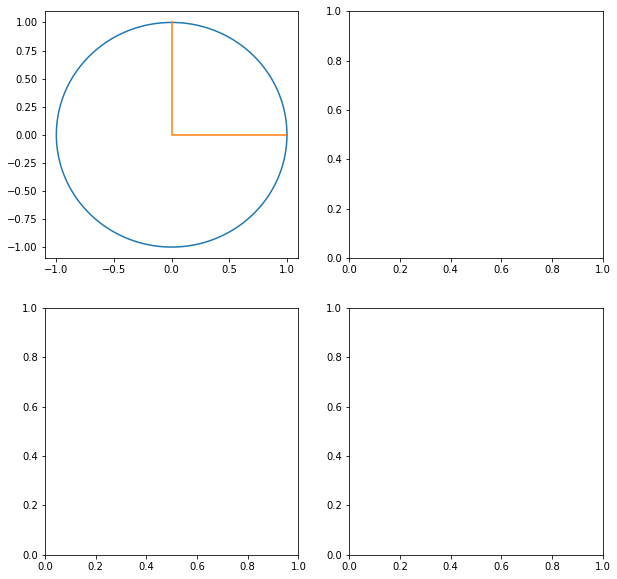

In [428]:
svd_viz(A)

## Problem 3

In [ ]:
def truncSVD(A):
    u,sigma, v = la.svd(A)
    
    
    